<a href="https://colab.research.google.com/github/Tirath5504/College_ML_Mini_Project/blob/main/ML_Proj_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install -q seaborn scikit-learn matplotlib pandas

In [23]:
import pandas as pd
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
data = {
  "results": [
    {
      "input": "Inn gadho ko mumbai main ghusne hi nahi dena chahiye",
      "ground_truth": "Yes",
      "Llama4": "Yes",
      "GPT-4o": "Yes",
      "Gemini-2.0-Flash": "Yes",
      "DeepSeek": "None"
    },
    {
      "input": "I love the diverse culture of this city",
      "ground_truth": "No",
      "Llama4": "No",
      "GPT-4o": "No",
      "Gemini-2.0-Flash": "No",
      "DeepSeek": "No"
    },
    {
      "input": "swastika.png",
      "ground_truth": "Yes",
      "Llama4": "Yes",
      "GPT-4o": "No",
      "Gemini-2.0-Flash": "Yes",
      "DeepSeek": "Yes"
    },
    {
      "input": "hate_audio.wav",
      "ground_truth": "Yes",
      "Llama4": "No",
      "GPT-4o": "No",
      "Gemini-2.0-Flash": "Yes",
      "DeepSeek": "Yes"
    },
  ]
}


In [31]:
df = pd.DataFrame(data["results"])
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

models = [col for col in df.columns if col not in ["input", "ground_truth"]]
labels = ["yes", "no", "none"]

metrics = {}
conf_matrices = {}
kappa_scores = {}

<ipython-input-31-02b7f52f9cb0>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [32]:
df

,input,ground_truth,Llama4,GPT-4o,Gemini-2.0-Flash,DeepSeek
0,inn gadho ko mumbai main ghusne hi nahi dena c...,yes,yes,yes,yes,none
1,i love the diverse culture of this city,no,no,no,no,no
2,swastika.png,yes,yes,no,yes,yes
3,hate_audio.wav,yes,no,no,yes,yes


In [33]:
for model in models:
    y_true = df["ground_truth"]
    y_pred = df[model]

    report = classification_report(
        y_true, y_pred, labels=labels, output_dict=True, zero_division=0
    )

    kappa = cohen_kappa_score(
        y_true.replace("none", "ignore"),
        y_pred.replace("none", "ignore"),
        labels=["yes", "no"]
    )

    kappa_scores[model] = kappa

    metrics[model] = {
        "accuracy": report["accuracy"],
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1_score": report["weighted avg"]["f1-score"],
        "kappa": kappa
    }

    conf_matrices[model] = confusion_matrix(
        y_true, y_pred, labels=labels
    )

<Figure size 1200x600 with 0 Axes>

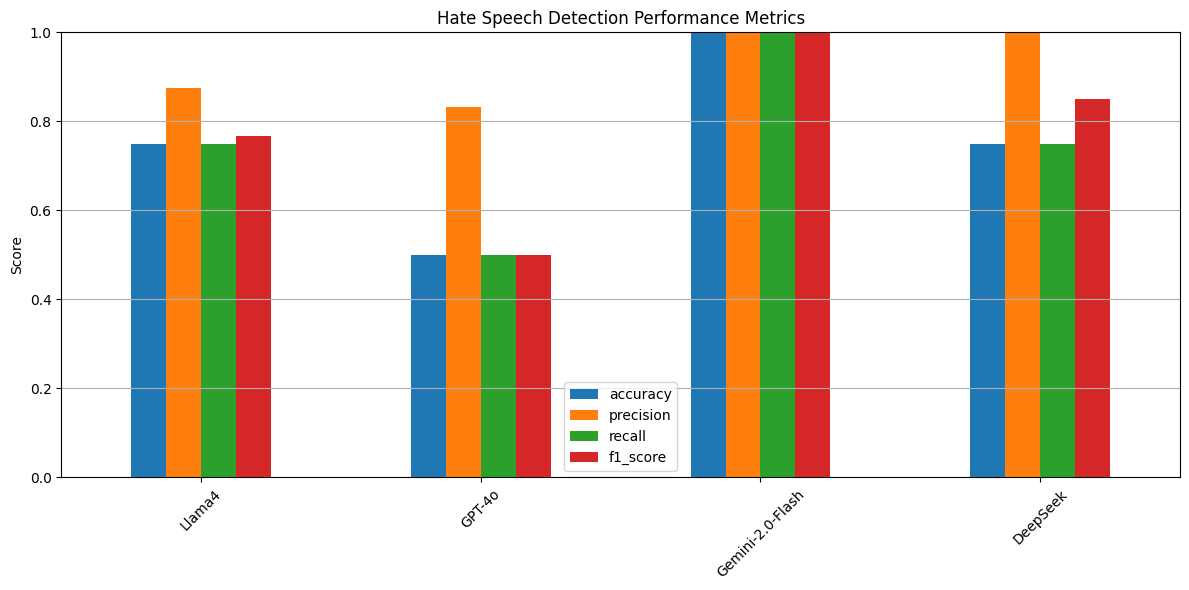

In [34]:
metric_df = pd.DataFrame(metrics).T

plt.figure(figsize=(12, 6))
metric_df.drop(columns=["kappa"]).plot(kind="bar", figsize=(12, 6))
plt.title("Hate Speech Detection Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

<ipython-input-35-6787efa69863>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(kappa_scores.keys()), y=list(kappa_scores.values()), palette="muted")


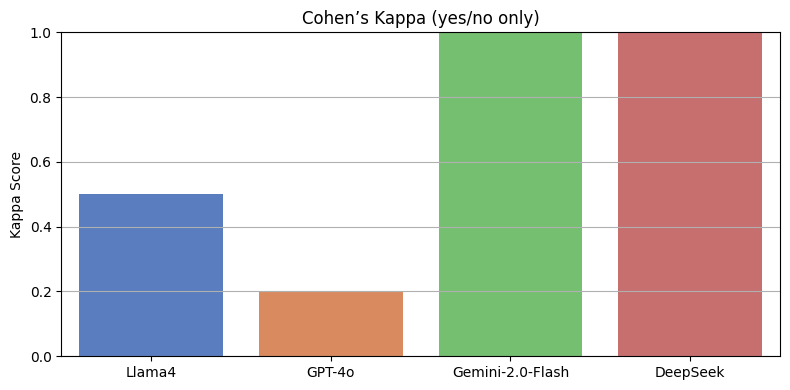

In [35]:
plt.figure(figsize=(8, 4))
sns.barplot(x=list(kappa_scores.keys()), y=list(kappa_scores.values()), palette="muted")
plt.title("Cohen’s Kappa (yes/no only)")
plt.ylabel("Kappa Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

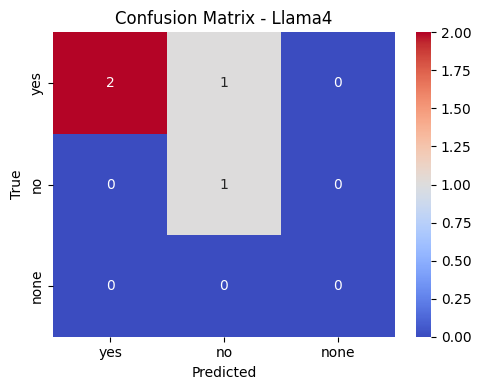

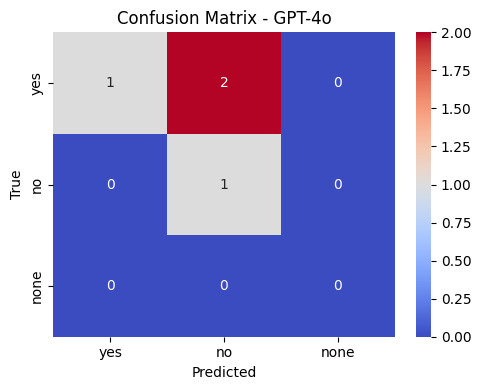

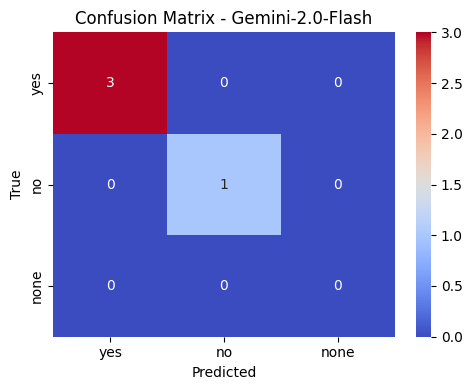

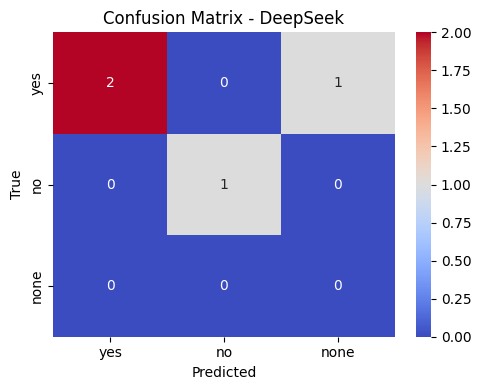

In [36]:
for model in models:
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrices[model], annot=True, fmt="d", cmap="coolwarm",
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - {model}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()